In [627]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Создадим карту:

In [606]:
def map(cities_num):
    np.random.seed(77)
    letters = [chr(i) for i in range(65, 65 + cities_num)]
    x = np.random.randint(1, 500, size= (cities_num, 2))
    return letters, x

In [608]:
names, cities = map(26)
store_val = list(zip(names, cities))
store_val

[('A', array([216,  96])),
 ('B', array([ 85, 469])),
 ('C', array([236, 294])),
 ('D', array([153, 416])),
 ('E', array([225, 442])),
 ('F', array([168, 118])),
 ('G', array([173, 276])),
 ('H', array([417, 316])),
 ('I', array([375, 229])),
 ('J', array([ 55, 421])),
 ('K', array([374, 432])),
 ('L', array([207, 400])),
 ('M', array([ 11, 200])),
 ('N', array([292, 188])),
 ('O', array([258, 268])),
 ('P', array([127, 338])),
 ('Q', array([378, 391])),
 ('R', array([405, 230])),
 ('S', array([185, 381])),
 ('T', array([ 98, 297])),
 ('U', array([258, 491])),
 ('V', array([183, 436])),
 ('W', array([133, 158])),
 ('X', array([308, 362])),
 ('Y', array([285, 129])),
 ('Z', array([477, 169]))]

Определим словарь с расстояниями от города i до всех остальных.

In [639]:
def distance_dict(cities, n): 
    d = dict()
    
    for i in range(n):
        city = dict()
        for j in range(n): # для измерения расстояния используем евклидовую метрику
            if i == j:
                continue
            c_a = cities[i][1]
            c_b = cities[j][1]
            dist = np.sqrt((c_a[0] - c_b[0]) ** 2 + (c_a[1] - c_b[1]) ** 2)
            city[cities[j][0]] = dist
        d[cities[i][0]] = city
    
    return d

In [640]:
cities_d = distance_dict(store_val, len(store_val))

Функция для подсчета общего расстояния путешествия:

In [617]:
def F(path, cities):
    dist = 0
    
    for i in range(len(path) - 1):
        dist += cities[path[i]][path[i + 1]]
    
    dist += cities[path[i + 1]][path[0]]
    
    return dist

Построим изначальный маршрут.

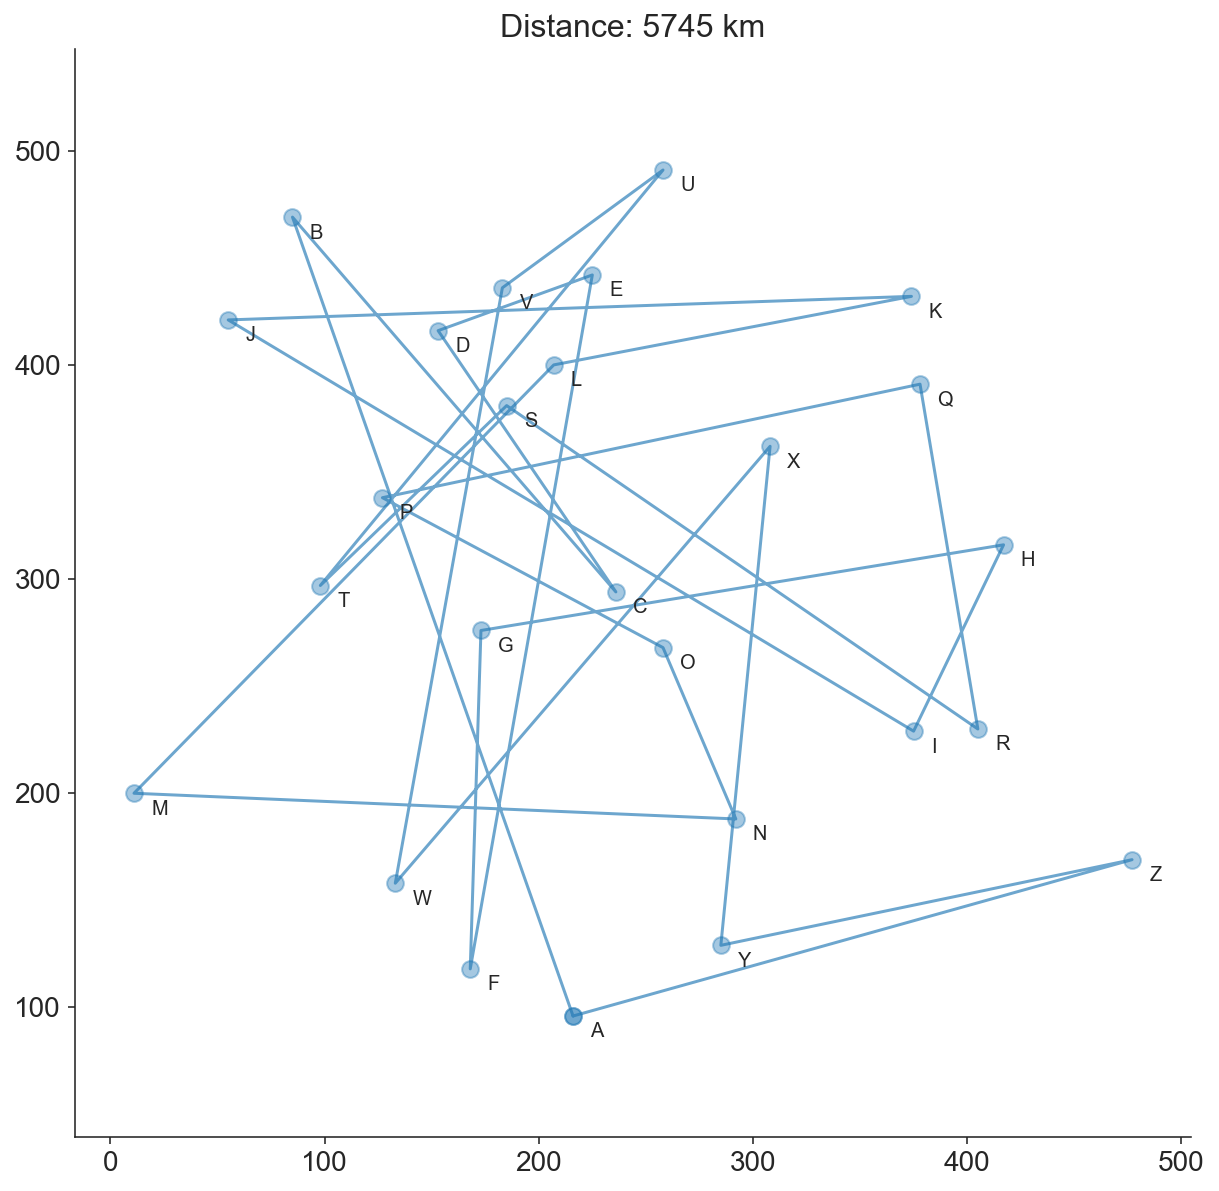

In [644]:
fig = plt.figure(figsize=(10,10))

path_close = np.vstack((cities, cities[0]))

# Удаляем лишние границы
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Корректируем оси абсцисс и ординат
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.title("Distance: {} km".format(int(F(names, cities_d))), fontsize=16)
plt.plot(path_close[:,0], path_close[:,1], alpha=0.65)
plt.scatter(path_close[:,0], path_close[:,1], s=70, marker='o', alpha=0.4)
for i in range(len(cities)): 
    plt.text(cities[i, 0] + 8, cities[i, 1] - 10,names[i]) # Добавляем имена городов
plt.axis("equal")
sns.set_style("white")

In [645]:
fig.savefig("TSP1.png", bbox_inches='tight', dpi=600)

За функцию G будет выступать простая перестановка.

In [648]:
def G(path, n):
    pos = path.copy()
    while True:
        i = np.random.randint(0, n - 1)
        j = np.random.randint(0, n - 1)
    
        if i != j:
            break
            
    pos[i], pos[j] = pos[j], pos[i]
    return pos

Метод отжига:

In [649]:
def SA(path, T):
    path_hat = path
    n = len(path_hat)
    np.random.seed(33412)
    np.random.shuffle(path_hat)
    T_0 = T
    k = 1
    
    for i in range(100000):
        path_tilda = G(path_hat, n)
        delta = F(path_tilda, cities_d) - F(path_hat, cities_d)
        prob = np.exp(- delta / T)
        
        if (delta < 0) or (prob >= np.random.random()):
            path_hat = path_tilda
        
        T = T_0 / np.log(k + 1)# 
        k += 1    
        
    return path_hat

In [576]:
path_opt = SA(names, 100)

In [577]:
path_opt

['I',
 'Z',
 'H',
 'X',
 'Q',
 'K',
 'U',
 'E',
 'S',
 'L',
 'V',
 'D',
 'B',
 'J',
 'T',
 'M',
 'W',
 'F',
 'A',
 'Y',
 'N',
 'G',
 'P',
 'C',
 'O',
 'R']

Построим почти оптимальный маршрут.

(-16.527232281017056, 504.5272322810172, 72.57191262249853, 514.4280873775015)

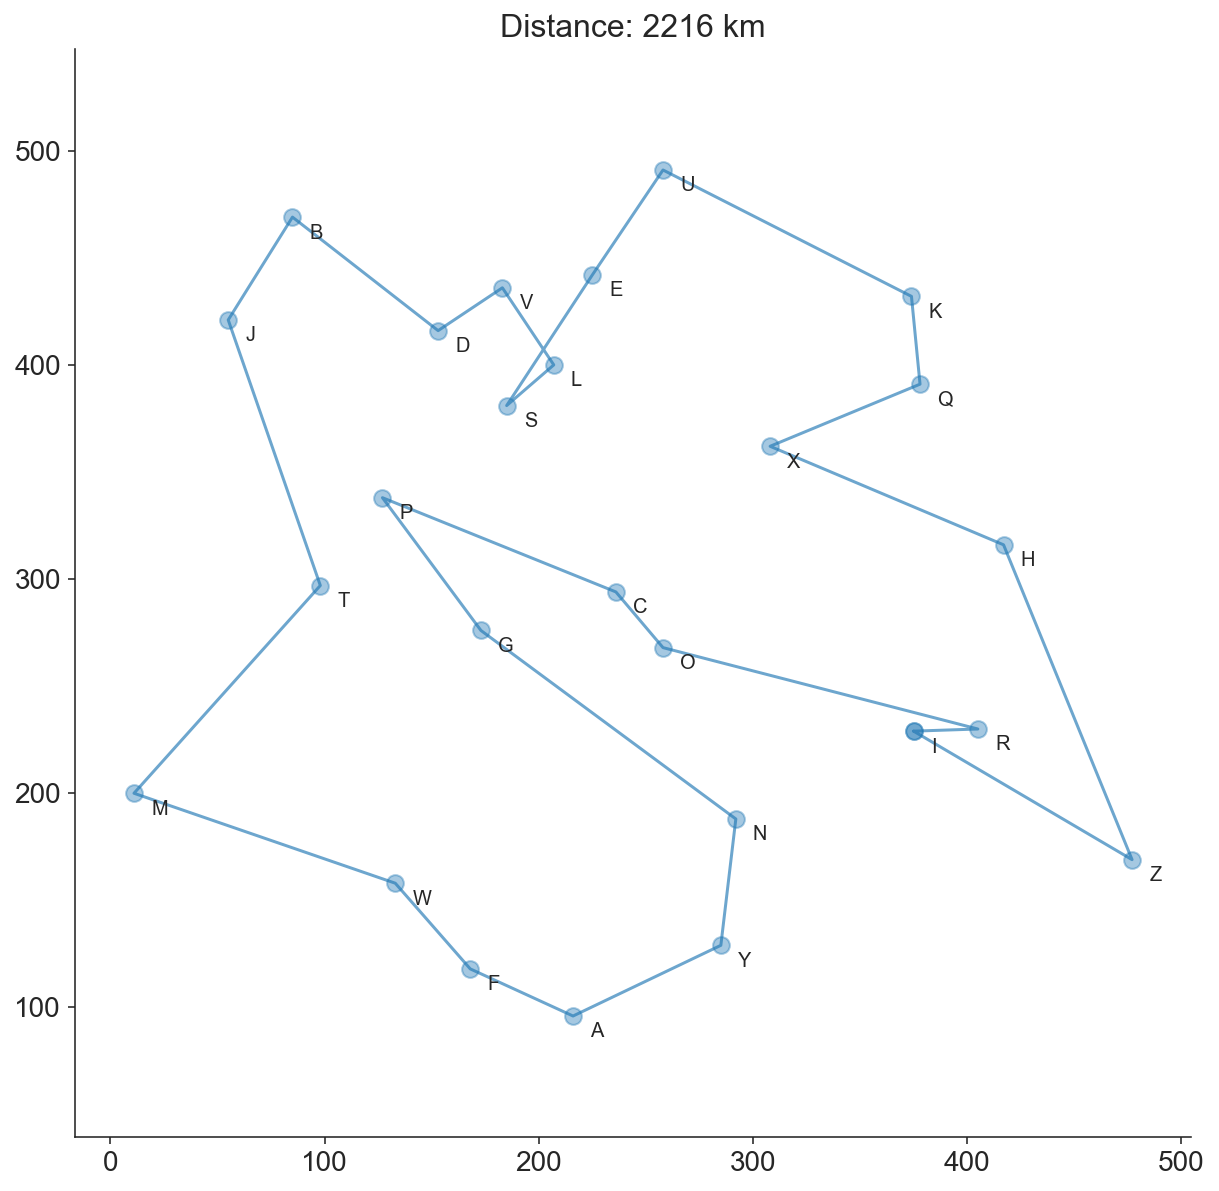

In [651]:
names = path_opt
x_opt = list()
y_opt = list()

cnt = 0
for name in names:
    for j in range(len(names)):
        if store_val[j][0] == name:
            if cnt == 0:
                a = store_val[j][1][0]
                b = store_val[j][1][1]
                cnt += 1
                
            x_opt.append(store_val[j][1][0])
            y_opt.append(store_val[j][1][1])

x_opt.append(a)
y_opt.append(b)


fig = plt.figure(figsize=(10, 10))
sns.set_style("white")

# Удаляем лишние границы
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Корректируем оси абсцисс и ординат
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.title("Distance: {} km".format(int(F(path_opt, cities_d))), fontsize=16)
plt.plot(x_opt, y_opt, alpha=0.65)
plt.scatter(x_opt, y_opt, s=70, marker='o', alpha=0.4)
for i in range(len(names)): 
    plt.text(x_opt[i] + 8, y_opt[i] - 10,names[i]) # Добавляем имена городов
plt.axis("equal")

In [652]:
fig.savefig("TSP2.png", bbox_inches='tight', dpi=600)